<a href="https://colab.research.google.com/github/brainmentorspvtltd/ML_OnlineFDP/blob/master/ML_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# pandas - read csv file and perform analysis
import pandas as pd
# numpy - to handle nd array like reshaping of data
import numpy as np
# matplotlib - for data visualization
import matplotlib.pyplot as plt
# StandardScaler - Feature Scaling (Standardization)
# LabelEncoder - For converting categorical data into numeric like (Gender -> Male/Female/Transgender -> 0/1/2)
# OneHotEncoder - For converting categorical data which has more than two categories into binary encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# LogisticRegression - To perform machine learning using logistic regression
from sklearn.linear_model import LogisticRegression
# SVC - Support Vector Classifier
from sklearn.svm import SVC
# train_test_split - divide the whole dataset into training and testing part
from sklearn.model_selection import train_test_split
# accurcay_score - to show accuracy of model
from sklearn.metrics import accuracy_score, classification_report

In [0]:
# reading csv from github url
dataset = pd.read_csv('https://raw.githubusercontent.com/brainmentorspvtltd/ML_OnlineFDP/master/covid_19_dataset.csv')

In [3]:
# print first 5 observations of data
dataset.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [4]:
# print unique countries
pd.unique(dataset['Country'])

array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Russia', 'Canada', 'Netherlands', 'Mexico',
       'Pakistan', 'Chile', 'Sweden', 'Peru', 'Ireland', 'Singapore',
       'Turkey', 'India', 'Australia', 'Malaysia', 'Argentina', 'Kuwait',
       'Morocco', 'Afghanistan', 'Finland', 'Norway', 'Bangladesh',
       'South Korea', 'Indonesia', 'Denmark', 'Romania', 'Ukraine',
       'Serbia', 'USA', 'Egypt', 'Thailand', 'Iraq', 'New Zealand',
       'Japan', 'South Africa', 'Slovakia', 'Somalia', 'Sri Lanka',
       'Oman', 'Belgium', 'Kazakhstan', 'Bahrain', 'Nigeria', 'Hungary',
       'Philippines', 'Armenia', 'Bulgaria', 'Cuba', 'Sudan', 'Estoria',
       'CostaRica', 'Gabon', 'Maldives', 'Albania', 'Cyprus', 'Kenya',
       'Georgia', 'Jordan', 'SanMario', 'Malta', 'Taiwan', 'Mauritius',
       'Congo', 'Vietnam', 'Zambia', 'Haiti', 'Liberia', 'Nepal', 'Togo',
       'Myanmar', 'Cambodia', 'Uganda', 'Bermuda', 'Monaco', 'Barbados',
    

In [5]:
# showing total number of unique countries
len(pd.unique(dataset['Country']))

97

In [6]:
# printing unique gender values
pd.unique(dataset['Gender'])

array(['Male', 'Transgender', 'Female'], dtype=object)

In [7]:
# printing unique severity values
pd.unique(dataset['Severity'])

array(['Mild', 'Moderate', 'Severe'], dtype=object)

In [8]:
# printing unique contact with covid patient column values
pd.unique(dataset['Contact_with_covid_patient'])

array(['No', 'Not known', 'Yes', 'yes'], dtype=object)

In [0]:
# converting into lower case
dataset['Contact_with_covid_patient'] = dataset['Contact_with_covid_patient'].str.lower()

In [10]:
pd.unique(dataset['Contact_with_covid_patient'])

array(['no', 'not known', 'yes'], dtype=object)

In [11]:
# groupby dataset with countries column and find average fever for each country
dataset.groupby('Country')['fever'].mean()

Country
Afghanistan    101.000000
Albania        100.642857
Argentina      101.000000
Armenia         99.750000
Australia      102.583333
                  ...    
Ukraine         99.833333
Vietnam        100.304348
Yemen           99.750000
Zambia         101.500000
Zimbabwe       100.555556
Name: fever, Length: 97, dtype: float64

In [0]:
# fetching the data of only infected patients
infected = dataset[dataset['Infected'] == 1]

In [13]:
# groupby infected people dataset with countries column and find average fever for each country
infected.groupby('Country')['fever'].mean()

Country
Afghanistan    100.888889
Albania        100.555556
Argentina      101.666667
Armenia        100.235294
Australia      102.666667
                  ...    
Ukraine        100.727273
Vietnam        101.093750
Yemen          100.000000
Zambia         101.571429
Zimbabwe       102.181818
Name: fever, Length: 94, dtype: float64

In [0]:
# creating object of label encoder
gender_label = LabelEncoder()

In [15]:
# using pre-defined method fit_transform which will apply label encoding
gender_label.fit_transform(dataset['Gender'])

array([1, 1, 2, ..., 0, 0, 0])

In [0]:
gender = gender_label.fit_transform(dataset['Gender'])

In [0]:
severity_label = LabelEncoder()
severity = severity_label.fit_transform(dataset['Severity'])

In [0]:
contact_label = LabelEncoder()
contact = contact_label.fit_transform(dataset['Contact_with_covid_patient'])

In [19]:
severity

array([0, 1, 2, ..., 0, 0, 2])

In [20]:
contact

array([0, 1, 0, ..., 2, 1, 2])

In [0]:
# creating object of OneHotEncoder
gender_onehot = OneHotEncoder()
# applying fit_transform method to convert label encoders values into binary
gender = gender_onehot.fit_transform(gender.reshape(len(gender),1))

In [0]:
# be default onehot returns sparse matrix, so we need to convert matrix into array
gender = gender.toarray()

In [0]:
severity_onehot = OneHotEncoder()
severity = severity_onehot.fit_transform(severity.reshape(len(severity), 1)).toarray()

In [0]:
contact_onehot = OneHotEncoder()
contact = contact_onehot.fit_transform(contact.reshape(len(contact),1)).toarray()

In [25]:
contact

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [0]:
# dropping gender, severity and contact column with text values, because now we have one hot encoded there values
updated_dataset = dataset.drop('Gender', axis=1)

In [0]:
updated_dataset = updated_dataset.drop('Severity', axis=1)
updated_dataset = updated_dataset.drop('Contact_with_covid_patient', axis=1)

In [28]:
updated_dataset.head()

,Country,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
0,China,10,102,1,0,0,0,1,0
1,Italy,20,103,1,1,0,0,0,1
2,Iran,55,99,0,0,0,1,1,0
3,Republic of Korean,37,100,0,1,1,0,0,1
4,France,45,101,1,1,1,1,0,1


In [0]:
# using iloc to slice data from a dataframe...starting from column_1 till last column (last column is exculsive)... 1:-1
X = updated_dataset.iloc[:, 1:-1].values
y = updated_dataset['Infected'].values

In [30]:
X[0]

array([ 10, 102,   1,   0,   0,   0,   1])

In [31]:
y[0]

0

In [32]:
contact.shape

(2499, 3)

In [33]:
severity.shape

(2499, 3)

In [34]:
gender.shape

(2499, 3)

In [35]:
X.shape

(2499, 7)

In [0]:
# now concatenating columns with our newly created X variable
X = np.c_[X,gender,severity,contact]

In [37]:
X.shape

(2499, 16)

In [38]:
X[0]

array([ 10., 102.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.])

In [0]:
# creating object of standard scaler to perform standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X[0]

array([-1.93214208,  0.82660093,  0.73015672, -0.64611936, -0.9688716 ,
       -0.94205214,  0.98058068, -0.9673204 ,  0.99401551, -0.11744404,
        0.75545367, -0.51571062, -0.42544317,  1.03793388, -0.58243308,
       -0.60092521])

In [0]:
# splitting data into train and test part
# 25% data will be used for testing and 75% for training
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [42]:
x_train.shape

(1874, 16)

In [43]:
x_test.shape

(625, 16)

In [44]:
y_train.shape

(1874,)

In [45]:
# applying machine learning..so first we create object of LogisticRegression package provided by sklearn
logistic = LogisticRegression()
# using fit method, which is pre-defined to perform classification on training data
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict is a pre-defined method which gives the prediction on testing data
y_pred = logistic.predict(x_test)

In [47]:
y_pred[0]

0

In [0]:
# import confusion matrix to see True Positive, True Negative, False Positive, False Negative
from sklearn.metrics import confusion_matrix

In [49]:
# just pass actual test targets and predicted targets
confusion_matrix(y_test,y_pred)

array([[299,  21],
       [ 17, 288]])

In [50]:
# similarly we can find accuracy using accuracy_score
accuracy_score(y_test, y_pred)

0.9392

In [0]:
# now after applying machine learning we take some data from user to test whether user is infected or not
user_age = 23
user_gender = 'Male'
user_fever = 98
user_bodypain = 1
user_runny_nose = 1
user_breath = 0
user_nasal = 0
user_throat = 0
user_severity = 'Moderate'
user_contact = 'yes'

In [0]:
# transform all the text columns into one hot encoded
gen = gender_onehot.transform([gender_label.transform([user_gender])])
sev = severity_onehot.transform([severity_label.transform([user_severity])])
con = contact_onehot.transform([contact_label.transform([user_contact])])

In [0]:
# convert into array, because we received sparse matrix
gen = gen.toarray()
sev = sev.toarray()
con = con.toarray()

In [0]:
# insert all user variables into a single array
test_data = np.array([[user_age, user_fever, user_bodypain,user_runny_nose,user_breath, user_nasal, user_throat]])

In [0]:
# concatenate one hot encoded columns at the end
test_data = np.c_[test_data, gen, sev, con]

In [56]:
test_data

array([[23., 98.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.]])

In [0]:
# feature scaling for test data
test_data = scaler.transform(test_data)

In [58]:
test_data

array([[-1.18399548, -1.51145874,  0.73015672,  1.54770166, -0.9688716 ,
        -0.94205214, -1.0198039 , -0.9673204 ,  0.99401551, -0.11744404,
        -1.32370791,  1.93907194, -0.42544317, -0.96345251, -0.58243308,
         1.66410059]])

In [59]:
# finally do prediction on your testing data
# 0 - Not Infected
# 1 - Infected
logistic.predict(test_data)

array([1])

In [60]:
logistic.predict_proba(test_data)

array([[0.00552172, 0.99447828]])

In [61]:
# Now test with SVM
# by default SVM uses rbf (radial based function kernel trick)
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svm = svm.predict(x_test)

In [64]:
# accuracy score using SVM
accuracy_score(y_test, y_pred_svm)

0.936

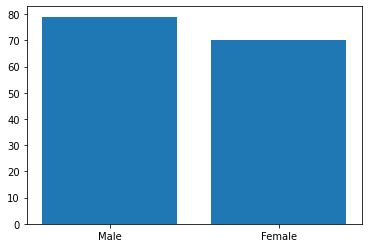

In [70]:
# bar plot of infected people
plt.bar(infected['Gender'], infected['Age'])
plt.show()